In [82]:
#Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn.ensemble import RandomForestClassifier  # Import Random Forest Classifier
from sklearn.metrics import classification_report

In [83]:
#import dataset
df=pd.read_csv("Steel_industry_data.csv")

In [84]:
df

,date,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,WeekStatus,Day_of_week,Load_Type
0,01-01-2018 00:15,3.17,2.95,0.00,0.0,73.21,100.00,900,Weekday,Monday,Light_Load
1,01-01-2018 00:30,4.00,4.46,0.00,0.0,66.77,100.00,1800,Weekday,Monday,Light_Load
2,01-01-2018 00:45,3.24,3.28,0.00,0.0,70.28,100.00,2700,Weekday,Monday,Light_Load
3,01-01-2018 01:00,3.31,3.56,0.00,0.0,68.09,100.00,3600,Weekday,Monday,Light_Load
4,01-01-2018 01:15,3.82,4.50,0.00,0.0,64.72,100.00,4500,Weekday,Monday,Light_Load
...,...,...,...,...,...,...,...,...,...,...,...
35035,31-12-2018 23:00,3.85,4.86,0.00,0.0,62.10,100.00,82800,Weekday,Monday,Light_Load
35036,31-12-2018 23:15,3.74,3.74,0.00,0.0,70.71,100.00,83700,Weekday,Monday,Light_Load
35037,31-12-2018 23:30,3.78,3.17,0.07,0.0,76.62,99.98,84600,Weekday,Monday,Light_Load
35038,31-12-2018 23:45,3.78,3.06,0.11,0.0,77.72,99.96,85500,Weekday,Monday,Light_Load


In [85]:
df.columns

Index(['date', 'Usage_kWh', 'Lagging_Current_Reactive.Power_kVarh',
       'Leading_Current_Reactive_Power_kVarh', 'CO2(tCO2)',
       'Lagging_Current_Power_Factor', 'Leading_Current_Power_Factor', 'NSM',
       'WeekStatus', 'Day_of_week', 'Load_Type'],
      dtype='object')

In [86]:
df.shape

(35040, 11)

# Handle Missing values

In [87]:
df.isnull().sum()

date                                    0
Usage_kWh                               0
Lagging_Current_Reactive.Power_kVarh    0
Leading_Current_Reactive_Power_kVarh    0
CO2(tCO2)                               0
Lagging_Current_Power_Factor            0
Leading_Current_Power_Factor            0
NSM                                     0
WeekStatus                              0
Day_of_week                             0
Load_Type                               0
dtype: int64

In [88]:
# no missing values present in the data set

In [89]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35040 entries, 0 to 35039
Data columns (total 11 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   date                                  35040 non-null  object 
 1   Usage_kWh                             35040 non-null  float64
 2   Lagging_Current_Reactive.Power_kVarh  35040 non-null  float64
 3   Leading_Current_Reactive_Power_kVarh  35040 non-null  float64
 4   CO2(tCO2)                             35040 non-null  float64
 5   Lagging_Current_Power_Factor          35040 non-null  float64
 6   Leading_Current_Power_Factor          35040 non-null  float64
 7   NSM                                   35040 non-null  int64  
 8   WeekStatus                            35040 non-null  object 
 9   Day_of_week                           35040 non-null  object 
 10  Load_Type                             35040 non-null  object 
dtypes: float64(6), 

In [90]:
df.dtypes.index

Index(['date', 'Usage_kWh', 'Lagging_Current_Reactive.Power_kVarh',
       'Leading_Current_Reactive_Power_kVarh', 'CO2(tCO2)',
       'Lagging_Current_Power_Factor', 'Leading_Current_Power_Factor', 'NSM',
       'WeekStatus', 'Day_of_week', 'Load_Type'],
      dtype='object')

In [91]:
import warnings
warnings.filterwarnings('ignore')

# Handle Outliers

['Usage_kWh', 'Lagging_Current_Reactive.Power_kVarh', 'Leading_Current_Reactive_Power_kVarh', 'CO2(tCO2)', 'Lagging_Current_Power_Factor', 'Leading_Current_Power_Factor', 'NSM']


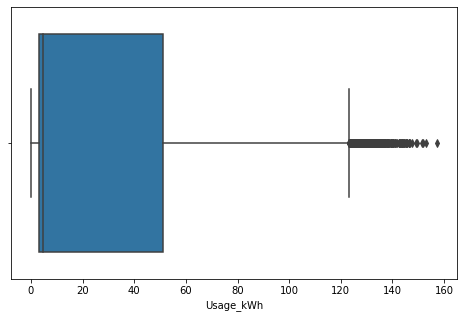



#############################


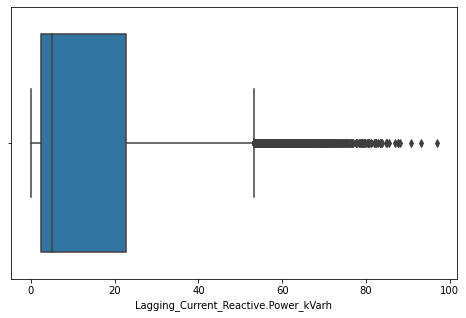



#############################


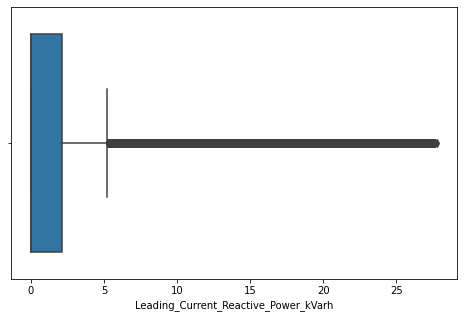



#############################


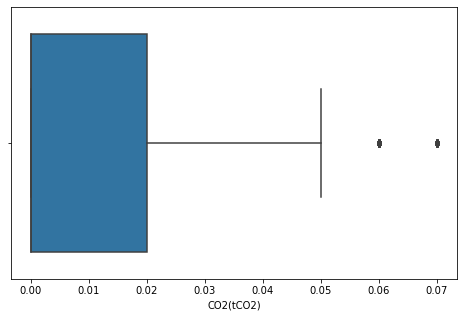



#############################


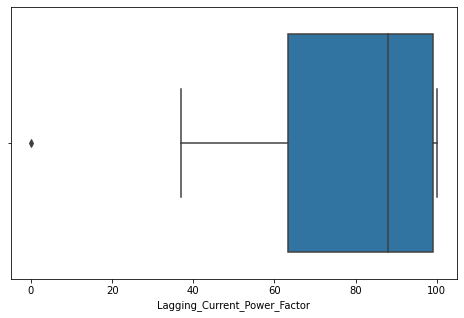



#############################


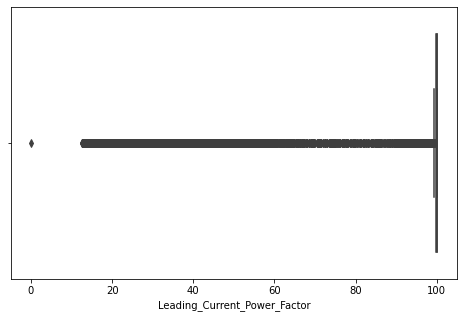



#############################


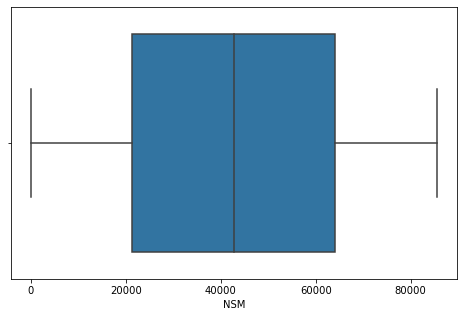



#############################


In [92]:
numerical_columns=[]
index_n=[]
m=0
for i in df.dtypes.index:
    if df.dtypes[i]!='object':
        numerical_columns.append(i)
        index_n.append(m)
    m=m+1
print(numerical_columns)

for i in numerical_columns:
    plt.figure(figsize=(8,5))
    sns.boxplot(df[i])
    plt.show()
    print('\n')
    print("#"*29)

In [93]:
import pandas as pd
import numpy as np

def replace_outliers_with_whiskers(df, col_name):
    q1 = df[col_name].quantile(0.25)
    q3 = df[col_name].quantile(0.75)
    iqr = q3 - q1  # Interquartile range
    fence_low = q1 - 1.5 * iqr
    fence_high = q3 + 1.5 * iqr

    df[col_name] = np.where(df[col_name] < fence_low, fence_low, df[col_name])
    df[col_name] = np.where(df[col_name] > fence_high, fence_high, df[col_name])

list_out = ['Usage_kWh', 'Lagging_Current_Reactive.Power_kVarh', 'Leading_Current_Reactive_Power_kVarh', 'CO2(tCO2)', 'Lagging_Current_Power_Factor', 'Leading_Current_Power_Factor', 'NSM']

df_no_outliers = df.copy()  # Create a copy of the original DataFrame

for var in list_out:
    replace_outliers_with_whiskers(df_no_outliers, var)

# Print the shape of the resulting DataFrame after replacing outliers with whisker values
print(df_no_outliers.shape)

(35040, 11)


['Usage_kWh', 'Lagging_Current_Reactive.Power_kVarh', 'Leading_Current_Reactive_Power_kVarh', 'CO2(tCO2)', 'Lagging_Current_Power_Factor', 'Leading_Current_Power_Factor', 'NSM']


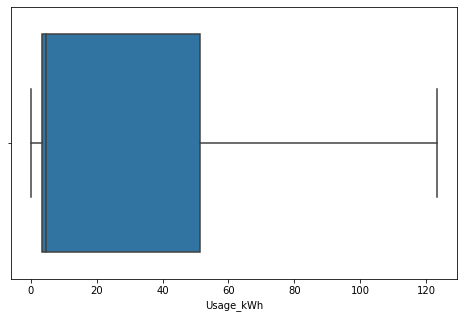



###############################################################################################################################


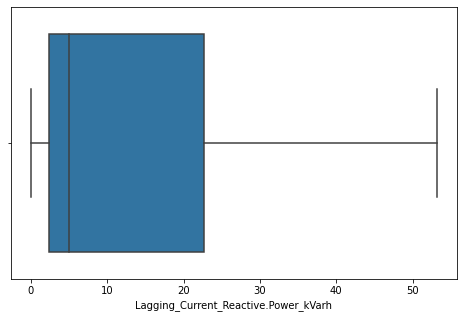



###############################################################################################################################


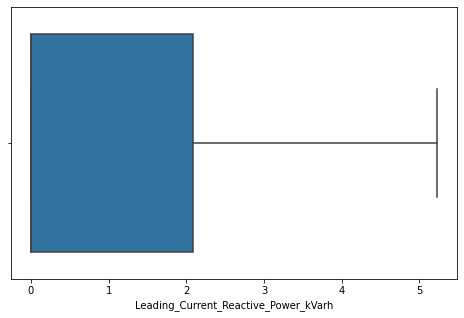



###############################################################################################################################


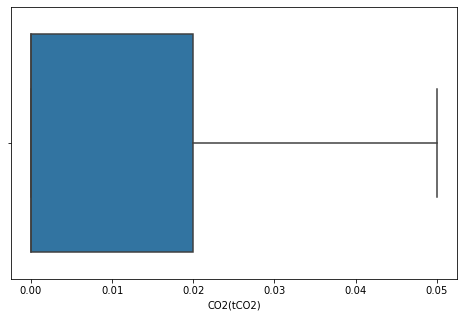



###############################################################################################################################


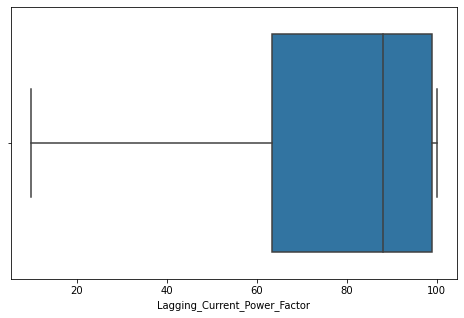



###############################################################################################################################


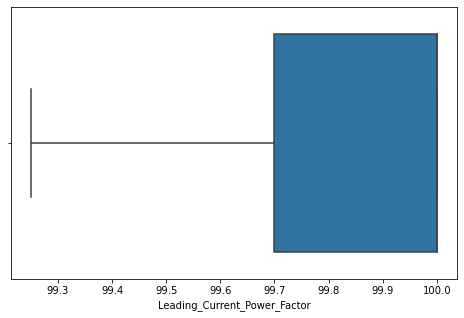



###############################################################################################################################


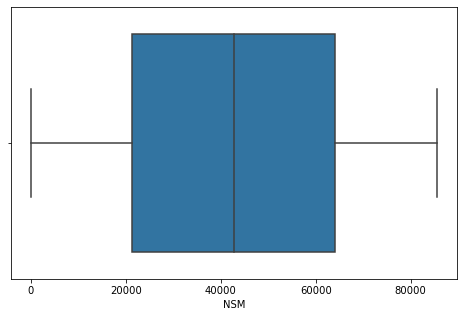



###############################################################################################################################


In [94]:
numerical_columns=[]
index_n=[]
m=0
for i in df_no_outliers.dtypes.index:
    if df_no_outliers.dtypes[i]!='object':
        numerical_columns.append(i)
        index_n.append(m)
    m=m+1
print(numerical_columns)

for i in numerical_columns:
    plt.figure(figsize=(8,5))
    sns.boxplot(df_no_outliers[i])
    plt.show()
    print('\n')
    print("#"*127)

In [95]:
df

,date,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,WeekStatus,Day_of_week,Load_Type
0,01-01-2018 00:15,3.17,2.95,0.00,0.0,73.21,100.00,900,Weekday,Monday,Light_Load
1,01-01-2018 00:30,4.00,4.46,0.00,0.0,66.77,100.00,1800,Weekday,Monday,Light_Load
2,01-01-2018 00:45,3.24,3.28,0.00,0.0,70.28,100.00,2700,Weekday,Monday,Light_Load
3,01-01-2018 01:00,3.31,3.56,0.00,0.0,68.09,100.00,3600,Weekday,Monday,Light_Load
4,01-01-2018 01:15,3.82,4.50,0.00,0.0,64.72,100.00,4500,Weekday,Monday,Light_Load
...,...,...,...,...,...,...,...,...,...,...,...
35035,31-12-2018 23:00,3.85,4.86,0.00,0.0,62.10,100.00,82800,Weekday,Monday,Light_Load
35036,31-12-2018 23:15,3.74,3.74,0.00,0.0,70.71,100.00,83700,Weekday,Monday,Light_Load
35037,31-12-2018 23:30,3.78,3.17,0.07,0.0,76.62,99.98,84600,Weekday,Monday,Light_Load
35038,31-12-2018 23:45,3.78,3.06,0.11,0.0,77.72,99.96,85500,Weekday,Monday,Light_Load


# c.	Scaling

In [96]:
# Scaling only applies to numeric columns, so we need to find numeric columns in the data set

In [97]:
numerical_columns=[]

for i in df.dtypes.index:
    if df.dtypes[i]!='object':
        numerical_columns.append(i)

print(numerical_columns)

['Usage_kWh', 'Lagging_Current_Reactive.Power_kVarh', 'Leading_Current_Reactive_Power_kVarh', 'CO2(tCO2)', 'Lagging_Current_Power_Factor', 'Leading_Current_Power_Factor', 'NSM']


In [98]:
# The query does not specify a target column and it needs to choose a dependent variable for this answer. and i  decide My Dependent Column Will be 'Usage_kWh'.
# So we are not appling scaling on 'Usage_kWh'

In [99]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

num_vars = ['Lagging_Current_Reactive.Power_kVarh', 'Leading_Current_Reactive_Power_kVarh', 'CO2(tCO2)', 'Lagging_Current_Power_Factor', 'Leading_Current_Power_Factor', 'NSM']

df[num_vars] = scaler.fit_transform(df[num_vars])

In [100]:
df

,date,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,WeekStatus,Day_of_week,Load_Type
0,01-01-2018 00:15,3.17,0.030441,0.000000,0.0,0.7321,1.0000,0.010526,Weekday,Monday,Light_Load
1,01-01-2018 00:30,4.00,0.046022,0.000000,0.0,0.6677,1.0000,0.021053,Weekday,Monday,Light_Load
2,01-01-2018 00:45,3.24,0.033846,0.000000,0.0,0.7028,1.0000,0.031579,Weekday,Monday,Light_Load
3,01-01-2018 01:00,3.31,0.036735,0.000000,0.0,0.6809,1.0000,0.042105,Weekday,Monday,Light_Load
4,01-01-2018 01:15,3.82,0.046435,0.000000,0.0,0.6472,1.0000,0.052632,Weekday,Monday,Light_Load
...,...,...,...,...,...,...,...,...,...,...,...
35035,31-12-2018 23:00,3.85,0.050150,0.000000,0.0,0.6210,1.0000,0.968421,Weekday,Monday,Light_Load
35036,31-12-2018 23:15,3.74,0.038593,0.000000,0.0,0.7071,1.0000,0.978947,Weekday,Monday,Light_Load
35037,31-12-2018 23:30,3.78,0.032711,0.002522,0.0,0.7662,0.9998,0.989474,Weekday,Monday,Light_Load
35038,31-12-2018 23:45,3.78,0.031576,0.003963,0.0,0.7772,0.9996,1.000000,Weekday,Monday,Light_Load


# d.	Feature Engineering

In [102]:
#find object type column

obj_columns=[]
for i in df.dtypes.index:
    if df.dtypes[i]=='object':
        obj_columns.append(i)
    
print(obj_columns)

['date', 'WeekStatus', 'Day_of_week', 'Load_Type']


In [ ]:
# Since date is not important for predicting the dependent variable, we drop it

In [103]:
df.drop(['date'], axis=1, inplace=True)

In [104]:
df

,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,WeekStatus,Day_of_week,Load_Type
0,3.17,0.030441,0.000000,0.0,0.7321,1.0000,0.010526,Weekday,Monday,Light_Load
1,4.00,0.046022,0.000000,0.0,0.6677,1.0000,0.021053,Weekday,Monday,Light_Load
2,3.24,0.033846,0.000000,0.0,0.7028,1.0000,0.031579,Weekday,Monday,Light_Load
3,3.31,0.036735,0.000000,0.0,0.6809,1.0000,0.042105,Weekday,Monday,Light_Load
4,3.82,0.046435,0.000000,0.0,0.6472,1.0000,0.052632,Weekday,Monday,Light_Load
...,...,...,...,...,...,...,...,...,...,...
35035,3.85,0.050150,0.000000,0.0,0.6210,1.0000,0.968421,Weekday,Monday,Light_Load
35036,3.74,0.038593,0.000000,0.0,0.7071,1.0000,0.978947,Weekday,Monday,Light_Load
35037,3.78,0.032711,0.002522,0.0,0.7662,0.9998,0.989474,Weekday,Monday,Light_Load
35038,3.78,0.031576,0.003963,0.0,0.7772,0.9996,1.000000,Weekday,Monday,Light_Load


In [105]:
#Transfer categorical column to numeric column to apply linear regression
dummy=pd.get_dummies(df[['WeekStatus', 'Day_of_week', 'Load_Type']])

In [106]:
dummy

,WeekStatus_Weekday,WeekStatus_Weekend,Day_of_week_Friday,Day_of_week_Monday,Day_of_week_Saturday,Day_of_week_Sunday,Day_of_week_Thursday,Day_of_week_Tuesday,Day_of_week_Wednesday,Load_Type_Light_Load,Load_Type_Maximum_Load,Load_Type_Medium_Load
0,1,0,0,1,0,0,0,0,0,1,0,0
1,1,0,0,1,0,0,0,0,0,1,0,0
2,1,0,0,1,0,0,0,0,0,1,0,0
3,1,0,0,1,0,0,0,0,0,1,0,0
4,1,0,0,1,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
35035,1,0,0,1,0,0,0,0,0,1,0,0
35036,1,0,0,1,0,0,0,0,0,1,0,0
35037,1,0,0,1,0,0,0,0,0,1,0,0
35038,1,0,0,1,0,0,0,0,0,1,0,0


In [ ]:
# Because the number of unique values in 'day_of_the_week' is greater than 5, labelencoder may be better for converting categorical columns to numeric columns for this column.

In [107]:

from sklearn.preprocessing import LabelEncoder 
le = LabelEncoder() 

df['Day_of_week']= le.fit_transform(df['Day_of_week']) 

In [108]:
new_dummy=pd.get_dummies(df[['WeekStatus', 'Load_Type']])

In [109]:
new_dummy

,WeekStatus_Weekday,WeekStatus_Weekend,Load_Type_Light_Load,Load_Type_Maximum_Load,Load_Type_Medium_Load
0,1,0,1,0,0
1,1,0,1,0,0
2,1,0,1,0,0
3,1,0,1,0,0
4,1,0,1,0,0
...,...,...,...,...,...
35035,1,0,1,0,0
35036,1,0,1,0,0
35037,1,0,1,0,0
35038,1,0,1,0,0


In [110]:
df=pd.concat([df,new_dummy], axis=1)

In [111]:
df

,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,WeekStatus,Day_of_week,Load_Type,WeekStatus_Weekday,WeekStatus_Weekend,Load_Type_Light_Load,Load_Type_Maximum_Load,Load_Type_Medium_Load
0,3.17,0.030441,0.000000,0.0,0.7321,1.0000,0.010526,Weekday,1,Light_Load,1,0,1,0,0
1,4.00,0.046022,0.000000,0.0,0.6677,1.0000,0.021053,Weekday,1,Light_Load,1,0,1,0,0
2,3.24,0.033846,0.000000,0.0,0.7028,1.0000,0.031579,Weekday,1,Light_Load,1,0,1,0,0
3,3.31,0.036735,0.000000,0.0,0.6809,1.0000,0.042105,Weekday,1,Light_Load,1,0,1,0,0
4,3.82,0.046435,0.000000,0.0,0.6472,1.0000,0.052632,Weekday,1,Light_Load,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35035,3.85,0.050150,0.000000,0.0,0.6210,1.0000,0.968421,Weekday,1,Light_Load,1,0,1,0,0
35036,3.74,0.038593,0.000000,0.0,0.7071,1.0000,0.978947,Weekday,1,Light_Load,1,0,1,0,0
35037,3.78,0.032711,0.002522,0.0,0.7662,0.9998,0.989474,Weekday,1,Light_Load,1,0,1,0,0
35038,3.78,0.031576,0.003963,0.0,0.7772,0.9996,1.000000,Weekday,1,Light_Load,1,0,1,0,0


In [112]:
# Now drop the categorical column
df.drop(['WeekStatus', 'Load_Type'], axis=1, inplace=True)

In [113]:
df

,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,Day_of_week,WeekStatus_Weekday,WeekStatus_Weekend,Load_Type_Light_Load,Load_Type_Maximum_Load,Load_Type_Medium_Load
0,3.17,0.030441,0.000000,0.0,0.7321,1.0000,0.010526,1,1,0,1,0,0
1,4.00,0.046022,0.000000,0.0,0.6677,1.0000,0.021053,1,1,0,1,0,0
2,3.24,0.033846,0.000000,0.0,0.7028,1.0000,0.031579,1,1,0,1,0,0
3,3.31,0.036735,0.000000,0.0,0.6809,1.0000,0.042105,1,1,0,1,0,0
4,3.82,0.046435,0.000000,0.0,0.6472,1.0000,0.052632,1,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
35035,3.85,0.050150,0.000000,0.0,0.6210,1.0000,0.968421,1,1,0,1,0,0
35036,3.74,0.038593,0.000000,0.0,0.7071,1.0000,0.978947,1,1,0,1,0,0
35037,3.78,0.032711,0.002522,0.0,0.7662,0.9998,0.989474,1,1,0,1,0,0
35038,3.78,0.031576,0.003963,0.0,0.7772,0.9996,1.000000,1,1,0,1,0,0


# e. Feature selection using VIF and P Value, R-squared and Adjusted R-squared

In [114]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35040 entries, 0 to 35039
Data columns (total 13 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Usage_kWh                             35040 non-null  float64
 1   Lagging_Current_Reactive.Power_kVarh  35040 non-null  float64
 2   Leading_Current_Reactive_Power_kVarh  35040 non-null  float64
 3   CO2(tCO2)                             35040 non-null  float64
 4   Lagging_Current_Power_Factor          35040 non-null  float64
 5   Leading_Current_Power_Factor          35040 non-null  float64
 6   NSM                                   35040 non-null  float64
 7   Day_of_week                           35040 non-null  int32  
 8   WeekStatus_Weekday                    35040 non-null  uint8  
 9   WeekStatus_Weekend                    35040 non-null  uint8  
 10  Load_Type_Light_Load                  35040 non-null  uint8  
 11  Load_Type_Maxim

In [ ]:
# All column data types are numeric, so we can move on to applying machine learning

In [115]:
# Declare feature vector and target variable
X = df.drop(['Usage_kWh'], axis=1) # Data set of all independet variables

y = df['Usage_kWh'] # Dataset of target variable

In [116]:
X

,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,Day_of_week,WeekStatus_Weekday,WeekStatus_Weekend,Load_Type_Light_Load,Load_Type_Maximum_Load,Load_Type_Medium_Load
0,0.030441,0.000000,0.0,0.7321,1.0000,0.010526,1,1,0,1,0,0
1,0.046022,0.000000,0.0,0.6677,1.0000,0.021053,1,1,0,1,0,0
2,0.033846,0.000000,0.0,0.7028,1.0000,0.031579,1,1,0,1,0,0
3,0.036735,0.000000,0.0,0.6809,1.0000,0.042105,1,1,0,1,0,0
4,0.046435,0.000000,0.0,0.6472,1.0000,0.052632,1,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
35035,0.050150,0.000000,0.0,0.6210,1.0000,0.968421,1,1,0,1,0,0
35036,0.038593,0.000000,0.0,0.7071,1.0000,0.978947,1,1,0,1,0,0
35037,0.032711,0.002522,0.0,0.7662,0.9998,0.989474,1,1,0,1,0,0
35038,0.031576,0.003963,0.0,0.7772,0.9996,1.000000,1,1,0,1,0,0


In [117]:
y

0        3.17
1        4.00
2        3.24
3        3.31
4        3.82
         ... 
35035    3.85
35036    3.74
35037    3.78
35038    3.78
35039    3.67
Name: Usage_kWh, Length: 35040, dtype: float64

In [118]:
# split X and y into training and testing sets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 10)

In [119]:
## Fitting Simple Linear Regression to the Training set
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [120]:
regressor.coef_
regressor.intercept_
#
print('Slope:' ,regressor.coef_)
print('Intercept:', regressor.intercept_)

Slope: [ 2.91438744e+01  1.89414295e+00  1.17352983e+02  1.10640215e+01
  5.44480344e+00 -3.31382941e-01  4.36676433e-02 -3.16897071e-02
  3.16897071e-02 -1.00631193e+00  3.01942141e-01  7.04369788e-01]
Intercept: -9.34859676055953


In [121]:
import statsmodels.api as sm

# Add a constant
X_train_lm = sm.add_constant(X_train) # to add constant to the model

In [122]:
X_train_lm

,const,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,Day_of_week,WeekStatus_Weekday,WeekStatus_Weekend,Load_Type_Light_Load,Load_Type_Maximum_Load,Load_Type_Medium_Load
23722,1.0,0.065422,0.000000,0.000000,0.5051,1.0000,0.115789,6,1,0,1,0,0
1168,1.0,0.041275,0.000000,0.000000,0.7629,1.0000,0.178947,2,0,1,1,0,0
24731,1.0,0.127747,0.000000,0.285714,0.9504,1.0000,0.631579,2,0,1,0,1,0
7068,1.0,0.409039,0.000000,0.571429,0.9069,1.0000,0.642105,4,1,0,0,1,0
8105,1.0,0.024868,0.053314,0.285714,0.9981,0.9993,0.442105,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10201,1.0,0.041585,0.000000,0.000000,0.6097,1.0000,0.273684,5,1,0,1,0,0
9372,1.0,0.000000,0.405980,0.142857,1.0000,0.9118,0.642105,3,0,1,0,1,0
28017,1.0,0.451759,0.000000,0.428571,0.8148,1.0000,0.863158,0,1,0,0,0,1
29199,1.0,0.042720,0.000000,0.000000,0.6245,1.0000,0.168421,4,1,0,1,0,0


In [123]:
# Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit() # Ordinary Least Square

#lr.params

print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:              Usage_kWh   R-squared:                       0.981
Model:                            OLS   Adj. R-squared:                  0.981
Method:                 Least Squares   F-statistic:                 1.350e+05
Date:                Wed, 11 Oct 2023   Prob (F-statistic):               0.00
Time:                        20:07:47   Log-Likelihood:                -77410.
No. Observations:               26280   AIC:                         1.548e+05
Df Residuals:                   26269   BIC:                         1.549e+05
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------


In [125]:
#####################VIF Calculations#######################

from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['Features'] = X_train_lm.columns
vif['VIF'] = [variance_inflation_factor(X_train_lm.values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
8,WeekStatus_Weekday,inf
9,WeekStatus_Weekend,inf
10,Load_Type_Light_Load,inf
11,Load_Type_Maximum_Load,inf
12,Load_Type_Medium_Load,inf
5,Leading_Current_Power_Factor,12.60
2,Leading_Current_Reactive_Power_kVarh,10.87
3,CO2(tCO2),10.21
1,Lagging_Current_Reactive.Power_kVarh,6.53
4,Lagging_Current_Power_Factor,4.04


In [ ]:
#Since the VIF score of "Leading_Current Power Factor" is greater than 5, multicollinearity exists, we will drop this column and check the summary

In [129]:
###################removing Leading_Current_Power_Factor n BUilding Model#############################

X_train_lm_1 = X_train_lm.drop(["Leading_Current_Power_Factor"], axis=1)

lr_1 = sm.OLS(y_train, X_train_lm_1).fit()

#lr_1.params

print(lr_1.summary())


                            OLS Regression Results                            
Dep. Variable:              Usage_kWh   R-squared:                       0.981
Model:                            OLS   Adj. R-squared:                  0.981
Method:                 Least Squares   F-statistic:                 1.484e+05
Date:                Wed, 11 Oct 2023   Prob (F-statistic):               0.00
Time:                        20:36:36   Log-Likelihood:                -77545.
No. Observations:               26280   AIC:                         1.551e+05
Df Residuals:                   26270   BIC:                         1.552e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------


In [ ]:
#NO changes in R squared and adj. R squared

In [130]:
# again checking vif score
X_train_lm_1 = X_train_lm.drop(["Leading_Current_Power_Factor"], axis=1)

vif = pd.DataFrame()
vif['Features'] = X_train_lm_1.columns
vif['VIF'] = [variance_inflation_factor(X_train_lm_1.values, i) for i in range(X_train_lm_1.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
7,WeekStatus_Weekday,inf
8,WeekStatus_Weekend,inf
9,Load_Type_Light_Load,inf
10,Load_Type_Maximum_Load,inf
11,Load_Type_Medium_Load,inf
3,CO2(tCO2),9.62
1,Lagging_Current_Reactive.Power_kVarh,6.25
4,Lagging_Current_Power_Factor,3.50
2,Leading_Current_Reactive_Power_kVarh,2.80
5,NSM,1.86


In [ ]:
#Since the VIF score of "CO2(tCO2)" is greater than 5, multicollinearity exists, we will drop this column and check the summary

In [131]:
###################removing CO2(tCO2) n BUilding Model#############################

X_train_lm_1 = X_train_lm.drop(["Leading_Current_Power_Factor", "CO2(tCO2)"], axis=1)

lr_1 = sm.OLS(y_train, X_train_lm_1).fit()

#lr_1.params

print(lr_1.summary())

                            OLS Regression Results                            
Dep. Variable:              Usage_kWh   R-squared:                       0.911
Model:                            OLS   Adj. R-squared:                  0.911
Method:                 Least Squares   F-statistic:                 3.347e+04
Date:                Wed, 11 Oct 2023   Prob (F-statistic):               0.00
Time:                        20:38:35   Log-Likelihood:                -97691.
No. Observations:               26280   AIC:                         1.954e+05
Df Residuals:                   26271   BIC:                         1.955e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------


In [132]:
###################removing Lagging_Current_Reactive.Power_kVarh n BUilding Model#############################

X_train_lm_1 = X_train_lm.drop(["Leading_Current_Power_Factor", "Lagging_Current_Reactive.Power_kVarh"], axis=1)

lr_1 = sm.OLS(y_train, X_train_lm_1).fit()

#lr_1.params

print(lr_1.summary())

                            OLS Regression Results                            
Dep. Variable:              Usage_kWh   R-squared:                       0.978
Model:                            OLS   Adj. R-squared:                  0.978
Method:                 Least Squares   F-statistic:                 1.433e+05
Date:                Wed, 11 Oct 2023   Prob (F-statistic):               0.00
Time:                        20:40:59   Log-Likelihood:                -79516.
No. Observations:               26280   AIC:                         1.590e+05
Df Residuals:                   26271   BIC:                         1.591e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
